In [2]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import math as m
import pandas as pd
import seaborn as sns

In [112]:
df = pd.read_csv('train.csv', nrows=10000)
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [113]:
df1 = df[df.Resolution == 'ARREST, BOOKED']
df2 = df[df.Resolution == 'NONE']
df = pd.concat([df1, df2])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9642 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dates       9642 non-null   object 
 1   Category    9642 non-null   object 
 2   Descript    9642 non-null   object 
 3   DayOfWeek   9642 non-null   object 
 4   PdDistrict  9642 non-null   object 
 5   Resolution  9642 non-null   object 
 6   Address     9642 non-null   object 
 7   X           9642 non-null   float64
 8   Y           9642 non-null   float64
dtypes: float64(2), object(7)
memory usage: 753.3+ KB


In [52]:
df['PdDistrict'].unique()

array(['NORTHERN', 'BAYVIEW', 'MISSION', 'PARK', 'INGLESIDE', 'SOUTHERN',
       'CENTRAL', 'TENDERLOIN', 'TARAVAL', 'RICHMOND'], dtype=object)

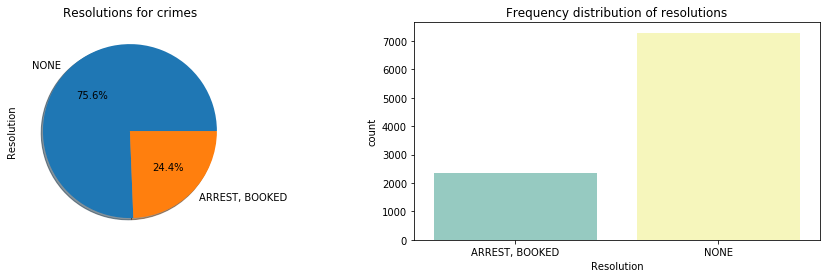

In [55]:
f,ax = plt.subplots(1,2,figsize=(16,4))

ax[0] = df['Resolution'].value_counts().plot.pie(explode=np.zeros(len(df['Resolution'].unique())),autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Resolutions for crimes')
ax[1] = sns.countplot(x="Resolution", data=df, palette="Set3")
ax[1].set_title("Frequency distribution of resolutions")
plt.show()

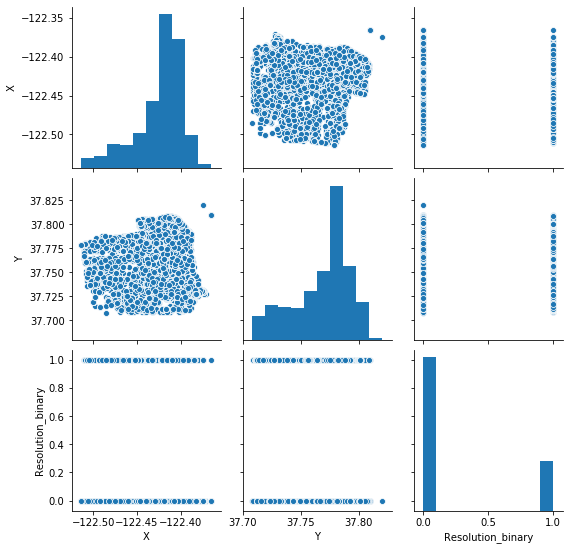

In [114]:
df['Resolution_binary'] = [0 if value == 'NONE' else 1 for value in df['Resolution'].values]
sns.pairplot(df)
plt.show()
#nothing useful

In [115]:
df.drop(['X','Y','Dates'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9642 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Category           9642 non-null   object
 1   Descript           9642 non-null   object
 2   DayOfWeek          9642 non-null   object
 3   PdDistrict         9642 non-null   object
 4   Resolution         9642 non-null   object
 5   Address            9642 non-null   object
 6   Resolution_binary  9642 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 922.6+ KB


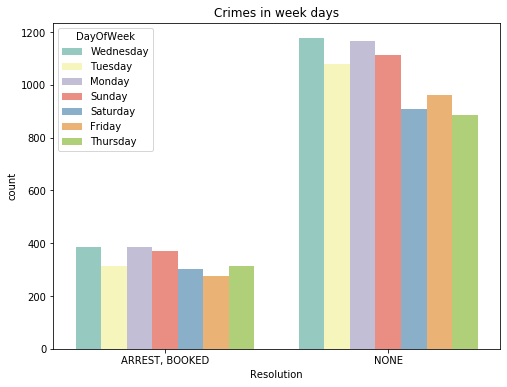

In [59]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="Resolution", hue="DayOfWeek", data=df, palette="Set3")
ax.set_title("Crimes in week days")
plt.show()
#for some reason we have more crimes without resolution from sunday to wednesday) 

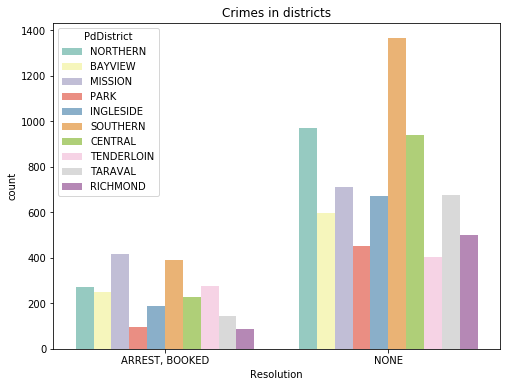

In [61]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="Resolution", hue="PdDistrict", data=df, palette="Set3")
ax.set_title("Crimes in districts")
plt.show()
#in central, southern and mission districts we probably have big amout of small crimes

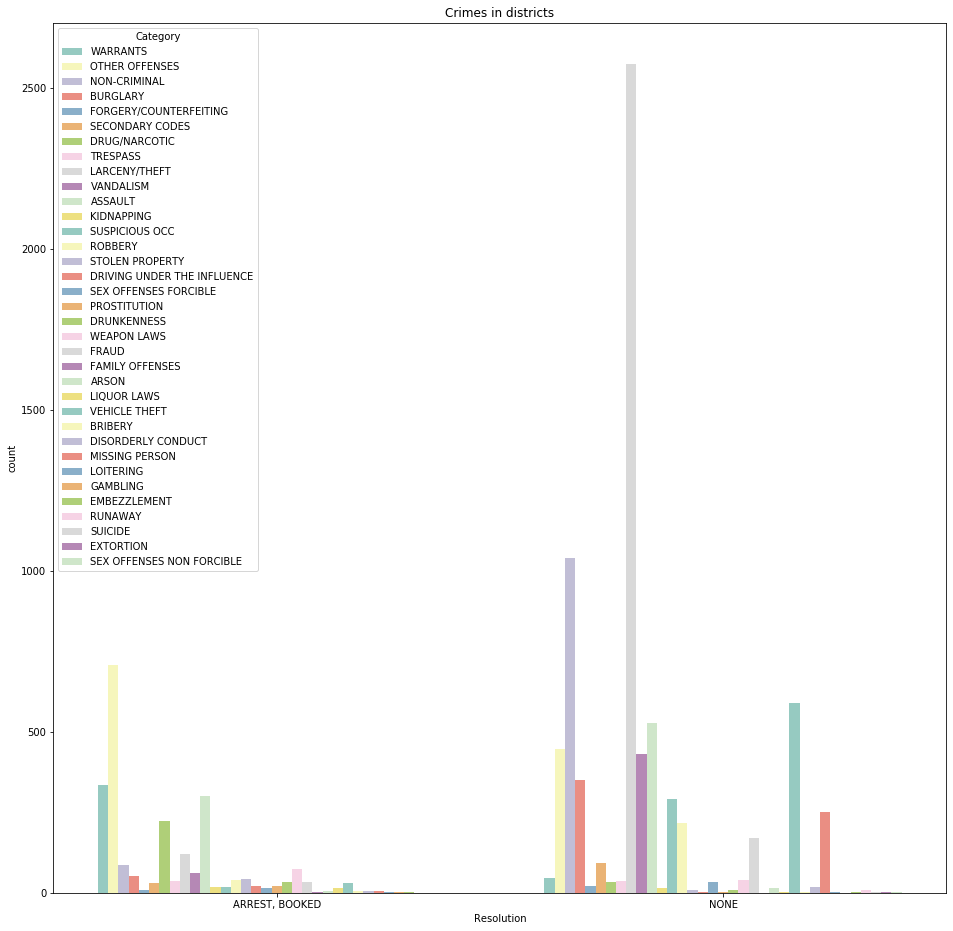

In [65]:
f, ax = plt.subplots(figsize=(16, 16))
ax = sns.countplot(x="Resolution", hue="Category", data=df, palette="Set3")
ax.set_title("Crimes in districts")
plt.show()
#in central, southern and mission districts we probably have big amout of small crimes

In [88]:
df.drop(['Resolution', 'Address'],1)

,Category,DayOfWeek,PdDistrict,Resolution_binary
0,WARRANTS,Wednesday,NORTHERN,1
1,OTHER OFFENSES,Wednesday,NORTHERN,1
2,OTHER OFFENSES,Wednesday,NORTHERN,1
18,OTHER OFFENSES,Wednesday,BAYVIEW,1
31,NON-CRIMINAL,Wednesday,MISSION,1
...,...,...,...,...
9993,LARCENY/THEFT,Sunday,CENTRAL,1
9994,BURGLARY,Sunday,PARK,1
9995,ASSAULT,Sunday,NORTHERN,1
9996,VANDALISM,Sunday,TARAVAL,1


### Encoding data

In [133]:
y = df['Resolution_binary']
X = df.drop(['Resolution', 'Address', 'Descript', 'Resolution_binary'],1)
df['Resolution_binary'].unique()

array([1, 0])

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [147]:
X_train.shape, X_test.shape

((7713, 3), (1929, 3))

In [148]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
print(categorical) 
print(numerical)

['Category', 'DayOfWeek', 'PdDistrict']
[]


In [149]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=categorical)


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [150]:
X_train.head()

,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,Category_9,Category_10,...,PdDistrict_1,PdDistrict_2,PdDistrict_3,PdDistrict_4,PdDistrict_5,PdDistrict_6,PdDistrict_7,PdDistrict_8,PdDistrict_9,PdDistrict_10
3089,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7353,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4230,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1795,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4661,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [151]:
X_train.shape

(7713, 52)

In [152]:
X_test.shape

(1929, 52)

### SkLearn

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
reg = LogisticRegression()

In [154]:
reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [155]:
reg.score(X_train, y_train)

0.848956307532737

In [156]:
y_test_pred = reg.predict(X_test)

In [157]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

average_precision = average_precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred, average='macro')
print("average precision: ", average_precision)
print("recall: ", recall)
'''as we see, it is hard to predict judges decision, because they are very subjective and for same crimes 
    different people can get different judgement.
'''

average precision:  0.5461904379406565
recall:  0.7923738857268017


In [158]:
rms = m.sqrt(mean_squared_error(y_test, y_test_pred))
mse = mean_squared_error(y_test, y_test_pred) 
mae = mean_absolute_error(y_test, y_test_pred)
print("RMSE:",rms)
print("MSE: ", mse)
print("MAE: ", mae)

RMSE: 0.38030846120085765
MSE:  0.14463452566096424
MAE:  0.14463452566096424


### Random Forest

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(random_state=0,n_estimators=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [160]:
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)

0.8439606013478487

In [161]:
average_precision = average_precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
print("average precision: ", average_precision)
print("recall: ", recall)

average precision:  0.5171245646480053
recall:  0.7741464614793767


In [162]:
rms = m.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)
print("RMSE:",rms)
print("MSE: ", mse)
print("MAE: ", mae)

RMSE: 0.39501822572148665
MSE:  0.15603939865215138
MAE:  0.15603939865215138


### Custom Regression

In [168]:
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0, ddof=1)
    X_norm = (X - mean) / std
    return X_norm, mean, std


def plot_data(A, b, test = False):
    positive_indices = np.where(b == 1)[0]
    negative_indices = np.where(b == 0)[0]
    
    plt.scatter(A.iloc[positive_indices, 0], A.iloc[positive_indices, 1], marker='x', c= 'yellow' if test else 'green')
    plt.scatter(A.iloc[negative_indices, 0], A.iloc[negative_indices, 1], marker='+', c= 'blue' if test else 'red')
    
    plt.show()


def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.column_stack((ones, X))
    return X_new


def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g


def h(X, theta):
    z = np.dot(X, theta)
    return sigmoid(z)


def cost_function(X, y, theta):
    m = X.shape[0]
    if m ==0:
        return None
    
    J = (-y * np.log(h(X, theta)) - (1 - y) * np.log(1 - h(X, theta))).mean()
    return J


def gradient_descent(X, y, theta, alpha, epsilon, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    
    J = cost_function(X, y, theta)
    
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        theta = theta - alpha*np.dot(X.T, (h(X, theta) - y))/m;
        
        J = cost_function(X, y, theta)
        
        J_history.append(J)
        
        if i % 1000 == 0 and print_J == True:
            print(J)
        
        if abs(J-J_history[-2]) < epsilon:
            break
            
    return theta, J_history


def predict(X, mean, std, theta):
    X_test_proc = prepare_X(X)
    predictions = h(X_test_proc, theta)
    return predictions



In [165]:
X_train.shape

(7713, 52)

In [166]:
theta =np.array(X_train.shape[1]*[0])

In [169]:
X_new, mean, std = normalize(X_train)

In [170]:
cost_function(X_train, y_train, theta)

0.6931471805599453

In [171]:
new_theta, Js = gradient_descent(X_train, y_train, theta, 0.01, 1e-7, 1000, False)
print(new_theta, len(Js))

[-7.12220952e-02  1.05765847e-01  1.67930683e-01 -2.35786656e-02
  1.77841883e-01 -1.20073882e-01 -3.77999283e-01 -8.07179312e-01
 -1.51026443e-01 -4.71847395e-02  2.18909132e-02  7.94713401e-03
 -3.49328288e-03 -2.37237667e-01 -1.16097835e-01 -1.09789607e-01
  2.33151491e-02 -5.32328650e-02  4.03725283e-03 -6.59519408e-03
  1.76537893e-02 -4.58797419e-03 -1.72535227e-03  1.37013398e-02
 -4.86623964e-03  1.03200661e-03 -3.98878432e-03  1.47545833e-03
  1.23744555e-02  9.98696298e-04  1.67099513e-04 -5.51310430e-04
 -6.11280360e-04  1.27353344e-04  7.11311098e-04 -2.43420985e-01
 -1.94186904e-01 -2.36031195e-01 -2.32926431e-01 -2.53505740e-01
 -2.54914455e-01 -1.69085729e-01 -7.06402214e-02 -2.82683075e-01
 -1.08649123e-01 -1.32419137e-01 -1.88828465e-01 -1.85372001e-02
 -2.37831902e-01 -2.06552913e-01 -1.52229581e-01 -1.85699822e-01] 1001


In [172]:
y_pred = h(X_test, new_theta)

In [173]:
rms = m.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)
print("RMSE:",rms)
print("MSE: ", mse)
print("MAE: ", mae)

RMSE: 0.4072399203817178
MSE:  0.16584435275250786
MAE:  0.3835019361883371


In [174]:
average_precision = average_precision_score(y_test, y_pred)
recall = recall_score(y_test, y_test_pred, average='macro')
print("average precision: ", average_precision)
print("recall: ", recall)

average precision:  0.5865586153932112
recall:  0.7923738857268017


Custom regression gives bigger error, but i think it's very hard to predict judgement for any algorithm